In [7]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv('./data/sentiment_word_tagging_train.csv', header=None, delimiter='\t')
str(raw_data.iloc[0].values[0])

'给/N 妈/N 妈/N 买/N 的/N ，/N 妈/N 妈/N 很/N 满/B 意/E 。/N'

In [8]:
s = ''
for index, row in raw_data.iterrows():
    if index != 0:
        s = s + ' '
    s = s + row.values[0]

In [9]:
import re
sentences = re.split(u'[，。！？、‘’“”]/[BMENS]', s)
def get_Xy(sentence):
    """将 sentence 处理成 [word1, w2, ..wn], [tag1, t2, ...tn]"""
    sentence = sentence.replace("//", '$/')
    words_tags = re.findall('(.)/(.)', sentence)
    if words_tags:
        words_tags = np.asarray(words_tags)
        words = words_tags[:, 0]
        tags = words_tags[:, 1]
        return words, tags # 所有的字和tag分别存为 data / label
    return None

datas = []
labels = []
for sentence in iter(sentences):
    res = get_Xy(sentence)
    if res:
        datas.append(res[0])
        labels.append(res[1])

In [10]:
df_data = pd.DataFrame({'words': datas, 'tags': labels}, index=range(len(datas)))
#　句子长度
df_data['sentence_len'] = df_data['words'].apply(lambda words: len(words))
df_data.head(2)

,tags,words,sentence_len
0,"[N, N, N, N, N]","[给, 妈, 妈, 买, 的]",5
1,"[N, N, N, B, E]","[妈, 妈, 很, 满, 意]",5


In [11]:
df_data.to_csv('suibian.csv', index=None, sep='\t')

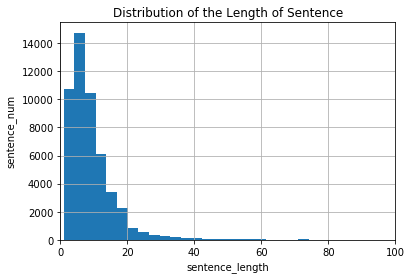

In [12]:
import matplotlib.pyplot as plt
df_data['sentence_len'].hist(bins=100)
plt.xlim(0, 100)
plt.xlabel('sentence_length')
plt.ylabel('sentence_num')
plt.title('Distribution of the Length of Sentence')
plt.show()

In [13]:
from itertools import chain
all_words = list(chain(*df_data['words'].values))


In [14]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(all_words)

Using TensorFlow backend.


In [15]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
tag_dict = {'B':1, 'M':2, 'E':3, 'S':4, 'N':5}

def word_to_index(sentence, flag):
    res = []
    if flag == 'content':
        tmp = tokenizer.texts_to_sequences(sentence)
        for i in tmp:
            if i:
                res.append(i[0])
    else:
        for word in sentence:
            res.append(tag_dict[word])
    return [res]




In [16]:
df_data['X'] = df_data['words'].apply(word_to_index, args = ['content'])
df_data['Y'] = df_data['tags'].apply(word_to_index, args = ['sentiment'])

In [17]:
df_data

,tags,words,sentence_len,X,Y
0,"[N, N, N, N, N]","[给, 妈, 妈, 买, 的]",5,"[[59, 245, 245, 12, 1]]","[[5, 5, 5, 5, 5]]"
1,"[N, N, N, B, E]","[妈, 妈, 很, 满, 意]",5,"[[245, 245, 7, 80, 67]]","[[5, 5, 5, 1, 3]]"
2,"[N, N, N, B, M, M, E]","[我, 觉, 得, 不, 是, 正, 品]",7,"[[17, 39, 62, 2, 4, 103, 35]]","[[5, 5, 5, 1, 2, 2, 3]]"
3,"[N, N, N, N, N, N, N, N, N, N, B, E]","[牙, 刷, 的, 后, 面, 有, 个, 点, 非, 常, 粗, 糙]",12,"[[322, 306, 1, 31, 78, 9, 14, 26, 109, 87, 434...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 3]]"
4,"[N, N, N]","[刮, 嘴, 唇]",3,"[[747, 786, 872]]","[[5, 5, 5]]"
5,"[N, N, N, N, S, N, N]","[和, 原, 厂, 的, 差, 太, 远]",7,"[[94, 246, 619, 1, 34, 30, 721]]","[[5, 5, 5, 5, 4, 5, 5]]"
6,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[之, 前, 用, 的, 刷, 头, 上, 写, 的, 是, d, i, a, m, o, ...",23,"[[132, 116, 8, 1, 306, 143, 23, 418, 1, 4, 526...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,..."
7,"[N, N, N, N, N, N, N, N, N, N, N, N]","[这, 个, 是, s, o, n, i, c, c, a, r, e]",12,"[[15, 14, 4, 531, 288, 480, 149, 585, 585, 362...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]"
8,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N]","[当, 然, 不, 排, 除, 改, 版, 质, 量, 下, 降, 的, 因, 素]",14,"[[223, 118, 2, 932, 575, 629, 397, 43, 55, 69,...","[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]"
9,"[N, N, N, N, N, N, S, N, N, N, N, B, E, N, N, ...","[但, 和, 以, 前, 买, 的, 差, 太, 多, 了, 是, 正, 品, , , ...",28,"[[64, 94, 21, 116, 12, 1, 34, 30, 52, 3, 4, 10...","[[5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 3, 5, 5,..."


In [18]:
df_data['X'] = df_data['X'].apply(pad_sequences, args=[40, 'int32', 'post'])
df_data['Y'] = df_data['Y'].apply(pad_sequences, args=[40, 'int32', 'post'])

In [23]:
X = np.asarray(list(df_data['X'].values))
y = np.asarray(list(df_data['Y'].values))

In [24]:
X = X.reshape(X.shape[0], X.shape[2])
y = y.reshape(y.shape[0], y.shape[2])

In [30]:
#将标签向量one-hot
def getY(y):
    res = []
    for row in y:
        for col in row:
            res.append(np_utils.to_categorical(col))
    return np.ndarray(res)
y = getY(y)

ValueError: sequence too large; cannot be greater than 32